## EN2550: Assignment 03 on Object Counting on a Conveyor Belt
### Index Number: 190696U
### Name :  Wijegunawardana C.H.W.

### Connected Component Analysis

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display.

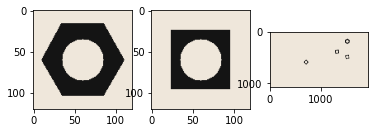

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image.

In [3]:
# Convert to Grayscale

hexnut_gray = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
belt_gray = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

Threshold of Hexnut = 20.0
Threshold of Squarenut = 20.0
Threshold of Belt = 20.0


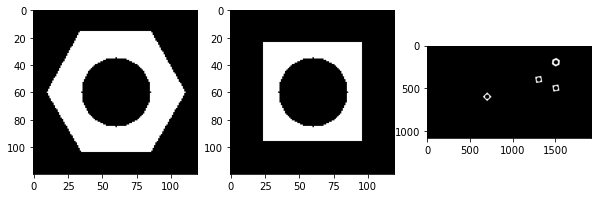

In [4]:
# Apply Otsu Thresholding

th_h, hexnut = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_s, squarenut = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, belt = cv.threshold(belt_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print("Threshold of Hexnut =", th_h)
print("Threshold of Squarenut =", th_s)
print("Threshold of Belt =", th_b)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(hexnut, cmap='gray')
ax[1].imshow(squarenut, cmap='gray')
ax[2].imshow(belt, cmap='gray')
plt.show()

3. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel.

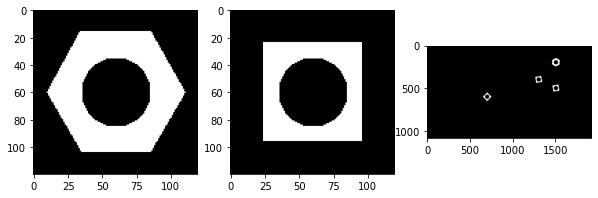

In [5]:
kernel = np.ones((3,3),np.uint8) #defining the kernal to indicate the number of neighbouring pixels we consider.
closing_hexnut = cv.morphologyEx(hexnut, cv.MORPH_CLOSE, kernel)
closing_squarenut = cv.morphologyEx(squarenut, cv.MORPH_CLOSE, kernel)
closing_belt = cv.morphologyEx(belt, cv.MORPH_CLOSE, kernel)

#viewing the result
fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(closing_hexnut, cmap='gray')
ax[1].imshow(closing_squarenut, cmap='gray')
ax[2].imshow(closing_belt, cmap='gray')
plt.show()

4. Apply the connectedComponentsWithStats function.

In [6]:
retval_h, labels_h, stats_h, centroids_h = cv.connectedComponentsWithStats(closing_hexnut)
retval_s, labels_s, stats_s, centroids_s = cv.connectedComponentsWithStats(closing_squarenut)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_belt)

print("Number of connected components in the belt =", retval_b)

Number of connected components in the belt = 5


b. What are the statistics?

Each row contains the statistics for each occurances of a connected component. The first row always corresponds to the background.

1. col=1: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
2. col=2: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
3. col=3: The horizontal size of the bounding box (width).
4. col=4: The vertical size of the bounding box (height).
5. col=5: The total area (in pixels) of the connected component.

In [7]:
print("Statistics of Hexnut =")
print(stats_h)
print("Statistics of Squarenut =")
print(stats_s)
print("Statistics of Belt =")
print(stats_b)

Statistics of Hexnut =
[[   0    0  120  120 9672]
 [  10   16  101   88 4728]]
Statistics of Squarenut =
[[    0     0   120   120 11173]
 [   24    24    72    72  3227]]
Statistics of Belt =
[[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]]


In [8]:
print("Centroids of each nut on the belt =")
print(centroids_b[1:]) # leaving out the first centriod which is the background

Centroids of each nut on the belt =
[[1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]]


5. Use findContours function to retrieve the extreme outer contours.

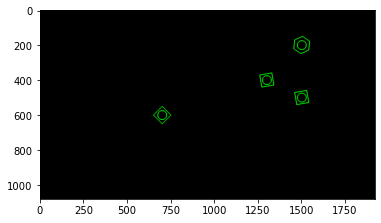

In [9]:
contours_h, hierarchy_h = cv.findContours(closing_hexnut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_s, hierarchy_s = cv.findContours(closing_squarenut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_belt, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours
im_contours_belt = np.zeros((belt_gray.shape[0],belt_gray.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

### Detecting Objects on a Synthetic Conveyor

1. Open the sequence and play it using the code below.

In [10]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2. Count the number of matching hexagonal nuts in conveyor_f100.png.

In [11]:
label = 1 # the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')  
# Find contours using the external edge of the connected components
contours_b, hierarchy_b = cv.findContours(closing_belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
n_hex = 0

print("Match each contour with the templates:")
objectNum=0  
for j,c in enumerate(contours_b):
        print("Object",objectNum)
        match_hex = cv.matchShapes(contours_h[0], c, cv.CONTOURS_MATCH_I1, 0.0)
        match_square = cv.matchShapes(contours_s[0], c, cv.CONTOURS_MATCH_I1, 0.0)
        print("Match with Hexnut :",match_hex)
        print("Match with Squarenut :",match_square)
        if (match_hex < match_square):
                n_hex += 1
        objectNum+=1

print()
print("Number of Hexagonal Nuts =", n_hex)

Match each contour with the templates:
Object 0
Match with Hexnut : 0.026949348359551983
Match with Squarenut : 6.816769371198461e-14
Object 1
Match with Hexnut : 0.027050230004169284
Match with Squarenut : 0.0001008816445491334
Object 2
Match with Hexnut : 0.027050230004169284
Match with Squarenut : 0.0001008816445491334
Object 3
Match with Hexnut : 8.228790019826349e-05
Match with Squarenut : 0.026867060459421888

Number of Hexagonal Nuts = 1


3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video.

In [12]:
# Function to process each frame by thresholding, closing, connected component analysis
def process_frame(img):
    """
    Input: Image
    Performs: Otsu Thresholding, Closing and Connected Component Analysis
    Output: statistics of the connected components
    """
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    kernel = np.ones((3,3),np.uint8)   # define the kernal size
    th_thresh, img_thresh = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)      # apply othsu's thresholding
    closing_img = cv.morphologyEx(img_thresh, cv.MORPH_CLOSE, kernel)    # apply closing to the binary image
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing_img)     # finding the statistics of the countours detected
    return retval, labels, stats, centroids, closing_img 

In [31]:
# Function to detect the similarity between two frames
def detect_diff(a, b, delta, i):
    """
    Input: a, b : Two vectors to compare
           delta: Vector of difference 
           i    : Specifies the indexes of the vectors to compare
    Output : True if the difference of vectors a and b exceed the delta values
    """
    # taking a-b of the ith coulmn and comparing it with delta_i
    # check all values are grater than delta_i
    return (((np.abs(a - b))[:,i] > delta[i]).all())
   

In [14]:
# Function to get the index of a nut of the current frame in the previous frame
def prev_index(a, b, delta, i):
    """
    Input: a, b : Two vectors to compare
           delta: Vector of difference 
           i    : Specifies the indexes of the vectors to compare
    Output : Returns the index of the previous occurance
    """
    index = -1
    diff = (np.abs(a - b)) # taking the absolute difference of np.arrays a - b
    diff[:,i] = (diff[:,i] <= delta[i]) # comparing each value is withing the range delta_i and assigning the boolean value to that index
    match = np.where(diff[:,i]) # finding the index where the value is within the the range
    # print(np.where(diff[:,i]))
    for c in match[0]:
       if np.count_nonzero(match[0] == c) == 2:
          index = c
         #  print(c)
    return index


In [95]:
# Functions to process the video frame by frame
def process_video(video_frames, contour_h, contour_s):
    """
    Input :  An array with each frame in the video, contour of a hexnut and squarenut
    Output : An array with the following details of each contour detected in each frame
                [x coordinate of center, y coordinate of contour, area of contour, nut type, index of the contour]
                nut_type = 0 for hexnuts
                nut_type = 1 for squarenuts
             The number of nuts in the video
    """

    frame_details = []
    delta_detect = np.array([15])
    delta_index = np.array([10,10])
    i_detect = np.array([0])   # Compare x coordinate  
    i_index = np.array([0,1])   # Compare x,y coordinate  
    n_nuts = 0
    n_in_frame = 0

    for frame in video_frames:
        n_in_frame = 0
        retval, labels, stats, centroids, closing_belt = process_frame(frame) 
        label = 1 
        belt = ((labels >= label)*255).astype('uint8')
        belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        frame_data = []     # initalising list to store nut details in a single frame
        for contours in belt_cont:
            match_h = 0
            match_s = 0
            match_h = cv.matchShapes(contour_h, contours, cv.CONTOURS_MATCH_I1, 0.0)
            match_s = cv.matchShapes(contour_s, contours, cv.CONTOURS_MATCH_I1, 0.0) 

            if match_h < match_s and match_h <= 1e-01:  # indicating a good hexnut match
                n_in_frame += 1                          # increasing the number of hexnuts by 1 if a new hexnut is found
                momentArray = cv.moments(contours)      # computing moments of the contours
                ca = momentArray['m00']                 # retrieving the area of the contour
                cx, cy = int(momentArray['m10']/momentArray['m00']),int(momentArray['m01']/momentArray['m00'])
                frame_data.append(np.array([cx, cy, ca, 0, n_in_frame])) # storing the nut deatails in frame

            elif match_h > match_s and match_s <= 1e-01:    # indicating a good squarenut match
                n_in_frame += 1                           # increasing the number of hexnuts by 1 if a new squarenut is found
                momentArray = cv.moments(contours)          # computing moments of the contours
                ca = momentArray['m00']                     # retrieving the area of the contour
                cx, cy = int(momentArray['m10']/momentArray['m00']),int(momentArray['m01']/momentArray['m00'])
                frame_data.append(np.array([cx, cy, ca, 1, n_in_frame])) # storing the nut deatails in frame
                
        # print(len(frame_details),n_in_frame)

        # print(frame_data)
        if n_nuts == 0:
            n_nuts = frame_data[-1][-1] # Intialize the n_nuts with the number of nuts in the first frame
        else:
            for nut in frame_data:
                if detect_diff(frame_details[-1], nut, delta_detect, i_detect) and ((nut[3] == 0 and nut[2] > 4600) or (nut[3] == 1 and nut[2] > 3050)): # new nut detected
                    n_nuts += 1
                    nut[-1] = n_nuts # assigning the next index to the new nut
                    # print(len(frame_details))
                else: # the nut is present in a previous frame
                    index_from_previous = prev_index(frame_details[-1], nut, delta_index, i_index)   
                    # print(index_from_previous) 
                    nut[-1] = frame_details[-1][int(index_from_previous)][-1] # assigning the index of the previous occurance of that nut
        # print(len(frame_details),n_nuts)
        frame_details.append(frame_data)    # appending the details of all the contours in the current frame
    
    return frame_details, n_nuts

### Testing

In [96]:
# Use the above two functions to compare the conveyor_f100.png and conveyor_f101.png.

frame1 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
frame2 = cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)
delta = np.array([10])
i = np.array([0])   # Compare x coordinate

frames = [frame1, frame2]
frame_details, n_nuts = process_video(frames,contours_h[0], contours_s[0])
print("Number of nuts =", n_nuts)
for contours in frame_details[1]:
    if (detect_diff(frame_details[0], contours, delta, i)):
        print("New nut Detected")
        

Number of nuts = 4.0


### Processing the Video

In [97]:
# cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0  
video = []

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("All frames loaded.")
        break

    f += 1
    video.append(frame)

    if cv.waitKey(1) == ord('q'):  
        break

# print(f)
frame_details, n_nuts = process_video(video, contours_h[0], contours_s[0])
print("Number of nuts =",n_nuts)
cap.release()
cv.destroyAllWindows()

All frames loaded.
Number of nuts = 8.0


In [98]:
# Annotating the frames and rendering the video
outputArray = []
frameIndex = 0
totalNumofFrames = 380
font = cv.FONT_HERSHEY_SIMPLEX
n_total = 0

for index in range(totalNumofFrames):
    colorImage = video[index]
    frame = frame_details[index]
    n_in_frame = 0
    for eachNut in frame:
        colorImage = cv.putText(colorImage,str(int(eachNut[-1])),(int(eachNut[0])-15,int(eachNut[1])+15),font, 1.2, (255,0,0), 4,cv.LINE_AA)
        n_in_frame += 1
        if (n_total < eachNut[-1]):
            n_total = int(eachNut[-1])

    # inserting text (frame number and number of nuts)
    colorImage = cv.putText(colorImage, "Frame "+str(frameIndex) , (25,800) , font, 1.5, (0,0,0), 3,cv.LINE_AA)
    colorImage = cv.putText(colorImage, "Nuts in the frame "+str(n_in_frame) , (25,900) , font, 1.5, (0,0,0), 3,cv.LINE_AA)
    colorImage = cv.putText(colorImage, "Total nuts "+str(n_total) , (25,1000) , font, 1.5, (0,0,0), 3,cv.LINE_AA)
    #i nserting index number
    colorImage = cv.putText(colorImage, "190696U" , (25,60) , font, 1.2, (0,0,0), 3,cv.LINE_AA)
    frameIndex += 1
    outputArray.append(colorImage)

# Saving as video file

fileName = '190696U_en2550_a05.mp4'
fourcc = cv.VideoWriter_fourcc(*'h264') # codec used to compress the frames
fps = 30 # Framerate
height, width, x = video[0].shape
frameSize = (width, height)
Color = True # write color images to the video

# Creating the Video Writer object
out = cv.VideoWriter(fileName, fourcc, fps, frameSize, Color)
for frame in outputArray:
    out.write(frame)

out.release()
print("Render completed.")


Render completed.
